In [52]:
import pandas
import matplotlib.pyplot as plt
# import matplotlib
import pathlib
import numpy as np
import re
import PIL
from PIL import Image
import shutil

cwd = pathlib.Path.cwd()

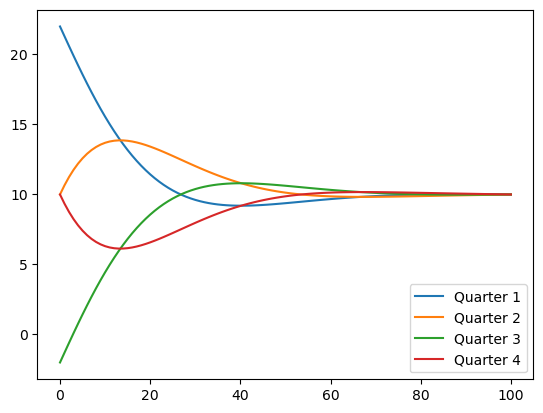

In [44]:
cpp_data = pandas.read_csv(str(cwd / "Problem1Data.csv"), header = 0)
x_data = cpp_data.loc[:, "n"]
cpp_data = cpp_data.set_index("n")
# print(cpp_data)


for col in cpp_data:
    name = re.split("_", col)[1]
    name = f"Quarter {name}"
    plt.plot(x_data, cpp_data.loc[:, col], label = name)
plt.title("Temp and Depth of the Earth's Crust throughout the year")
plt.legend(loc = "lower right")
plt.show()

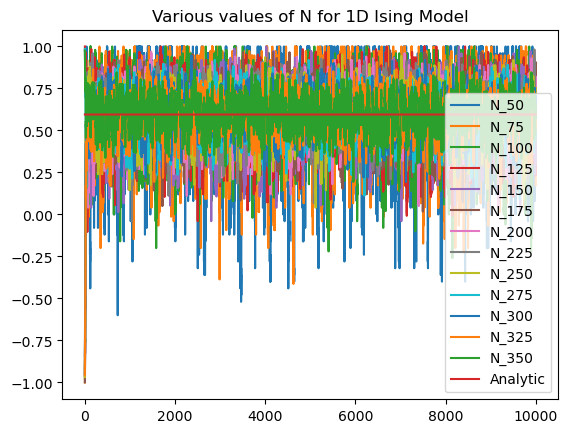

In [59]:
cpp_data = pandas.read_csv(str(cwd / "MagData_N.csv"), header = 0)
x_data = cpp_data.loc[:, "t"]
cpp_data = cpp_data.set_index("t")
analytic = 0.59491 * np.ones(shape = (x_data.shape))
# print(cpp_data)


for col in cpp_data:
    plt.plot(x_data, cpp_data.loc[:, col], label = col)
plt.plot(x_data, analytic, label = "Analytic")
plt.title("Various values of N for 1D Ising Model")
plt.legend()
plt.show()

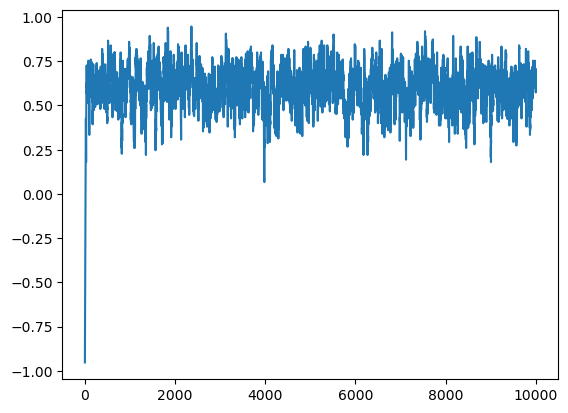

In [42]:
plt.plot(x_data, cpp_data.loc[:, "N_300"])
plt.show()


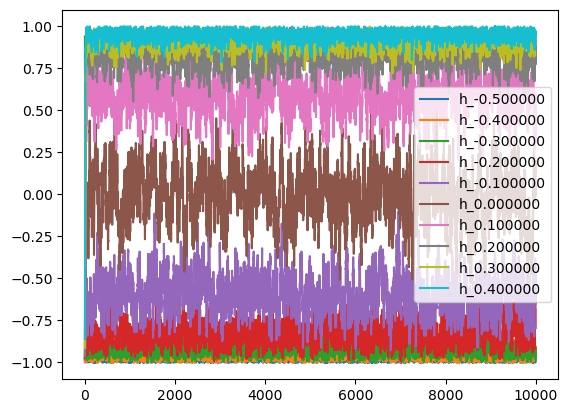

In [43]:
cpp_data = pandas.read_csv(str(cwd / "MagData_h.csv"), header = 0)
x_data = cpp_data.loc[:, "t"]
cpp_data = cpp_data.set_index("t")
# print(cpp_data)


for col in cpp_data:
    plt.plot(x_data, cpp_data.loc[:, col], label = col)
plt.title("Different Values of h for 1D Ising Model")
plt.legend()
plt.show()

Bonus: this makes a gif of the N values for the 1D Ising Model. It's output to a file called "NValues.gif" and is not displayed here.

In [61]:
cpp_data = pandas.read_csv(str(cwd / "MagData_N.csv"), header = 0)
x_data = cpp_data.loc[:, "t"]
cpp_data = cpp_data.set_index("t")
analytic = 0.59491 * np.ones(shape = (x_data.shape))

temp_folder = cwd / "TempFolder"
temp_folder.mkdir(parents = True, exist_ok = True)

for col in cpp_data:
    name = re.split("_", col)[1]
    name = f"N = {name}"

    plt.plot(x_data, cpp_data.loc[:, col])
    plt.plot(x_data, analytic)
    plt.title(name)
    plt.savefig(str(temp_folder/ f"{col}.png"))
    plt.close()

png_files = list(temp_folder.rglob("*.png"))
frames = []
for png in png_files:
    new_frame = Image.open(png)
    frames.append(new_frame)

frames[0].save(str(cwd / "NValues.gif"), format="GIF", append_images=frames[1:], save_all = True, loop = 0, duration = 300) 
shutil.rmtree(temp_folder)
